<a href="https://colab.research.google.com/github/annvorosh/GB/blob/StatMed/StatMed_L08_%D0%9F%D0%A0%D0%9E%D0%95%D0%9A%D0%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 8. Итоговый проект
## Практическое задание

### К уроку приложен реальный датасет по когорте пациентов с одним из наиболее агрессивных раков — с раком поджелудочной железы.
- Препроцессируйте уже анонимизированные данные, интегрируйте разделы датасета с помощью функций семейства _join.
- Сделайте описательные статистики датасета, не забудьте посмотреть, что за тип переменных содержится в колонках.
- Попробуйте проверить несколько гипотез с помощью статистических тестов (на качественных переменных) и сделайте анализ выживаемости.
- В каких группах (по каким переменным) выживаемость отличается?
- Задание выполняется на языке R и предоставляется в Google Colab или PDF/html рендере Quarto.


## Установка библиотек

In [1]:
library(readr)

In [2]:
install.packages("ggplot2")
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:

install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ stringr   1.5.1
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
install.packages("survival")
library(survival)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("ggsurvfit")
library(ggsurvfit)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘patchwork’




In [6]:
install.packages("gtsummary")
library(gtsummary)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘V8’, ‘reactR’, ‘labelled’, ‘bigD’, ‘bitops’, ‘htmlwidgets’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘broom.helpers’, ‘gt’




In [7]:
install.packages("tidycmprsk")
library(tidycmprsk)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cmprsk’, ‘hardhat’



Attaching package: ‘tidycmprsk’


The following object is masked from ‘package:gtsummary’:

    trial




In [8]:
install.packages("condSURV" )
library(condSURV)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘cubature’, ‘quadprog’, ‘quantreg’, ‘iterators’, ‘rngtools’, ‘np’, ‘doParallel’, ‘doRNG’, ‘foreach’




In [9]:
install.packages("survminer")
library(survminer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘lme4’, ‘corrplot’, ‘car’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [10]:
install.packages("janitor")
library(janitor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [11]:
install.packages("psych")
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’



Attaching package: ‘psych’


The following object is masked from ‘package:ggsurvfit’:

    %+%


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




## Загрузка данных

In [425]:
pathology <- read_tsv("pathology_detail.tsv")
follow_up <- read_tsv("follow_up.tsv")
family_history <- read_tsv("family_history.tsv")
exposure <- read_tsv("exposure.tsv")
clinical <- read_tsv("clinical.tsv")

Rows: 126 Columns: 77
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (77): case_id, case_submitter_id, project_id, diagnosis_id, diagnosis_su...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `timepoint_category` -> `timepoint_category...78`
• `timepoint_category` -> `timepoint_category...133`
Rows: 306 Columns: 137
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (137): case_id, case_submitter_id, project_id, adverse_event, adverse_ev...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 46 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): case_id, case_submitter_id, project_id, relatio

In [481]:
# Интеграция данных
merged_data <- clinical %>%
  left_join(follow_up, by = "case_id") %>%
  left_join(pathology, by = "case_id") %>%
  left_join(family_history, by = "case_id") %>%
  left_join(exposure, by = "case_id")

Warning message in left_join(., follow_up, by = "case_id"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 14 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
Warning message in left_join(., pathology, by = "case_id"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 370 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


## Препроцессирование данных

In [482]:
# Замена значений "/'--" и "'--" на NA
merged_data <- merged_data %>%
  mutate(across(everything(), ~ ifelse(. %in% c("/'--", "'--"), NA, .))) %>%
  janitor::remove_empty("cols")



head(merged_data)

case_id,case_submitter_id.x,project_id.x,age_at_index,age_is_obfuscated,cause_of_death,days_to_birth,days_to_death,ethnicity,gender,⋯,cigarettes_per_day,exposure_duration_years,exposure_type,pack_years_smoked,secondhand_smoke_as_child,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,type_of_smoke_exposure,years_smoked
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00061f34-c891-4f9c-b8d6-3ca68b98c875,AD1348,FM-AD,NA,NA,NA,NA,NA,not reported,female,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0035b612-8955-4da5-a35d-bced5b32cbec,AD258,FM-AD,NA,NA,NA,NA,NA,not reported,male,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
008147fd-3235-4bab-b816-7589590959d1,AD10836,FM-AD,NA,NA,NA,NA,NA,not reported,female,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
00f67c2e-b77f-4082-907c-1dd4ea418f14,AD12672,FM-AD,NA,NA,NA,NA,NA,not reported,female,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01462f16-c767-40ee-8c81-d3927d308aa8,AD8272,FM-AD,NA,NA,NA,NA,NA,not reported,female,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
014cd6ee-733c-4894-997e-cfb534a587c1,AD15735,FM-AD,NA,NA,NA,NA,NA,not reported,female,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [483]:
colnames(merged_data)

[1] "case_id"                                
  [2] "case_submitter_id.x"                    
  [3] "project_id.x"                           
  [4] "age_at_index"                           
  [5] "age_is_obfuscated"                      
  [6] "cause_of_death"                         
  [7] "days_to_birth"                          
  [8] "days_to_death"                          
  [9] "ethnicity"                              
 [10] "gender"                                 
 [11] "race"                                   
 [12] "vital_status"                           
 [13] "year_of_birth"                          
 [14] "year_of_death"                          
 [15] "age_at_diagnosis"                       
 [16] "ajcc_clinical_m"                        
 [17] "ajcc_clinical_stage"                    
 [18] "ajcc_pathologic_m"                      
 [19] "ajcc_pathologic_n"                      
 [20] "ajcc_pathologic_stage"                  
 [21] "ajcc_pathologic_t"                      
 [22] "ajcc_staging_system_edition"            
 [23] "best_overall_response"                  
 [24] "classification_of_tumor"                
 [25] "days_to_best_overall_response"          
 [26] "days_to_diagnosis"                      
 [27] "days_to_last_follow_up"                 
 [28] "days_to_last_known_disease_status"      
 [29] "days_to_recurrence.x"                   
 [30] "icd_10_code"                            
 [31] "last_known_disease_status"              
 [32] "metastasis_at_diagnosis"                
 [33] "morphology"                             
 [34] "primary_diagnosis"                      
 [35] "prior_malignancy"                       
 [36] "prior_treatment"                        
 [37] "progression_or_recurrence.x"            
 [38] "residual_disease...118"                 
 [39] "site_of_resection_or_biopsy"            
 [40] "synchronous_malignancy"                 
 [41] "tissue_or_organ_of_origin"              
 [42] "tumor_focality"                         
 [43] "tumor_grade"                            
 [44] "year_of_diagnosis"                      
 [45] "days_to_treatment_end"                  
 [46] "days_to_treatment_start"                
 [47] "initial_disease_status"                 
 [48] "regimen_or_line_of_therapy"             
 [49] "residual_disease...189"                 
 [50] "therapeutic_agents"                     
 [51] "treatment_intent_type"                  
 [52] "treatment_or_therapy"                   
 [53] "treatment_outcome"                      
 [54] "treatment_type"                         
 [55] "case_submitter_id.y"                    
 [56] "project_id.y"                           
 [57] "bmi.x"                                  
 [58] "comorbidity"                            
 [59] "days_to_follow_up"                      
 [60] "days_to_progression"                    
 [61] "days_to_progression_free"               
 [62] "days_to_recurrence.y"                   
 [63] "diabetes_treatment_type"                
 [64] "disease_response"                       
 [65] "ecog_performance_status"                
 [66] "follow_up_id"                           
 [67] "follow_up_submitter_id"                 
 [68] "height.x"                               
 [69] "karnofsky_performance_status"           
 [70] "progression_or_recurrence.y"            
 [71] "progression_or_recurrence_anatomic_site"
 [72] "weight.x"                               
 [73] "aa_change"                              
 [74] "antigen"                                
 [75] "blood_test_normal_range_upper"          
 [76] "gene_symbol"                            
 [77] "molecular_analysis_method"              
 [78] "molecular_test_id"                      
 [79] "molecular_test_submitter_id"            
 [80] "test_result"                            
 [81] "test_units"                             
 [82] "test_value"                             
 [83] "variant_type"                           
 [84] "case_submit

In [484]:
# Вычисление процента заполненных строк для каждого столбца
percent_filled <- colMeans(!is.na(merged_data)) * 100

# Создание таблицы с названиями столбцов и процентом заполненных строк
filled_data_summary <- data.frame(percent_filled)

filled_data_summary

,percent_filled
,<dbl>
case_id,100.000000
case_submitter_id.x,100.000000
project_id.x,100.000000
age_at_index,13.186030
age_is_obfuscated,52.280827
cause_of_death,39.629366
days_to_birth,71.204562
days_to_death,43.157520
ethnicity,100.000000


Думаю, стоит оставить признаки, в которых присутствует хотя бы умеренное количество данных

In [486]:
# Подсчет количества столбцов, где процент заполненных строк более 40%
sum(percent_filled > 40)

[1] 47

In [487]:
# Выбор столбцов, где процент заполненных строк менее 40%
columns_to_remove <- names(percent_filled[percent_filled < 40])

columns_to_remove

[1] "age_at_index"                           
 [2] "cause_of_death"                         
 [3] "year_of_death"                          
 [4] "ajcc_clinical_m"                        
 [5] "ajcc_clinical_stage"                    
 [6] "best_overall_response"                  
 [7] "days_to_best_overall_response"          
 [8] "days_to_last_follow_up"                 
 [9] "days_to_last_known_disease_status"      
[10] "days_to_recurrence.x"                   
[11] "residual_disease...118"                 
[12] "synchronous_malignancy"                 
[13] "tumor_focality"                         
[14] "year_of_diagnosis"                      
[15] "days_to_treatment_end"                  
[16] "days_to_treatment_start"                
[17] "regimen_or_line_of_therapy"             
[18] "residual_disease...189"                 
[19] "therapeutic_agents"                     
[20] "treatment_outcome"                      
[21] "bmi.x"                                  
[22] "comorbidity"                            
[23] "days_to_progression"                    
[24] "days_to_progression_free"               
[25] "days_to_recurrence.y"                   
[26] "diabetes_treatment_type"                
[27] "disease_response"                       
[28] "ecog_performance_status"                
[29] "height.x"                               
[30] "karnofsky_performance_status"           
[31] "progression_or_recurrence.y"            
[32] "progression_or_recurrence_anatomic_site"
[33] "weight.x"                               
[34] "aa_change"                              
[35] "antigen"                                
[36] "blood_test_normal_range_upper"          
[37] "gene_symbol"                            
[38] "molecular_analysis_method"              
[39] "molecular_test_id"                      
[40] "molecular_test_submitter_id"            
[41] "test_result"                            
[42] "test_units"                             
[43] "test_value"                             
[44] "variant_type"                           
[45] "case_submitter_id.x.x"                  
[46] "project_id.x.x"                         
[47] "diagnosis_id"                           
[48] "diagnosis_submitter_id"                 
[49] "lymph_nodes_positive.y"                 
[50] "pathology_detail_id"                    
[51] "pathology_detail_submitter_id"          
[52] "peripancreatic_lymph_nodes_positive.y"  
[53] "peripancreatic_lymph_nodes_tested.y"    
[54] "tumor_largest_dimension_diameter.y"     
[55] "relationship_primary_diagnosis"         
[56] "alcohol_days_per_week"                  
[57] "alcohol_history"                        
[58] "cigarettes_per_day"                     
[59] "exposure_duration_years"                
[60] "exposure_type"                          
[61] "pack_years_smoked"                      
[62] "secondhand_smoke_as_child"              
[63] "tobacco_smoking_onset_year"             
[64] "tobacco_smoking_quit_year"              
[65] "type_of_smoke_exposure"                 
[66] "years_smoked"

In [488]:
# Удаление выбранных столбцов
data_cleaned <- merged_data[, !names(merged_data) %in% columns_to_remove]

In [490]:
colnames(data_cleaned)

[1] "case_id"                      "case_submitter_id.x"         
 [3] "project_id.x"                 "age_is_obfuscated"           
 [5] "days_to_birth"                "days_to_death"               
 [7] "ethnicity"                    "gender"                      
 [9] "race"                         "vital_status"                
[11] "year_of_birth"                "age_at_diagnosis"            
[13] "ajcc_pathologic_m"            "ajcc_pathologic_n"           
[15] "ajcc_pathologic_stage"        "ajcc_pathologic_t"           
[17] "ajcc_staging_system_edition"  "classification_of_tumor"     
[19] "days_to_diagnosis"            "icd_10_code"                 
[21] "last_known_disease_status"    "metastasis_at_diagnosis"     
[23] "morphology"                   "primary_diagnosis"           
[25] "prior_malignancy"             "prior_treatment"             
[27] "progression_or_recurrence.x"  "site_of_resection_or_biopsy" 
[29] "tissue_or_organ_of_origin"    "tumor_grade"                 
[31] "initial_disease_status"       "treatment_intent_type"       
[33] "treatment_or_therapy"         "treatment_type"              
[35] "case_submitter_id.y"          "project_id.y"                
[37] "days_to_follow_up"            "follow_up_id"                
[39] "follow_up_submitter_id"       "case_submitter_id.y.y"       
[41] "project_id.y.y"               "relationship_type"           
[43] "relative_with_cancer_history" "case_submitter_id"           
[45] "project_id"                   "alcohol_intensity"           
[47] "tobacco_smoking_status"

In [491]:
# Убираем столбцы с идентификаторами, кроме case_id
data_cleaned <- data_cleaned %>%
  select(-contains("_id"), case_id)

colnames(data_cleaned)

[1] "age_is_obfuscated"            "days_to_birth"               
 [3] "days_to_death"                "ethnicity"                   
 [5] "gender"                       "race"                        
 [7] "vital_status"                 "year_of_birth"               
 [9] "age_at_diagnosis"             "ajcc_pathologic_m"           
[11] "ajcc_pathologic_n"            "ajcc_pathologic_stage"       
[13] "ajcc_pathologic_t"            "ajcc_staging_system_edition" 
[15] "classification_of_tumor"      "days_to_diagnosis"           
[17] "icd_10_code"                  "last_known_disease_status"   
[19] "metastasis_at_diagnosis"      "morphology"                  
[21] "primary_diagnosis"            "prior_malignancy"            
[23] "prior_treatment"              "progression_or_recurrence.x" 
[25] "site_of_resection_or_biopsy"  "tissue_or_organ_of_origin"   
[27] "tumor_grade"                  "initial_disease_status"      
[29] "treatment_intent_type"        "treatment_or_therapy"        
[31] "treatment_type"               "days_to_follow_up"           
[33] "relationship_type"            "relative_with_cancer_history"
[35] "alcohol_intensity"            "tobacco_smoking_status"      
[37] "case_id"

In [492]:
# Вычисление процента заполненных строк для каждого столбца
percent_filled <- colMeans(!is.na(data_cleaned)) * 100

data.frame(percent_filled)

,percent_filled
,<dbl>
age_is_obfuscated,52.28083
days_to_birth,71.20456
days_to_death,43.15752
ethnicity,100.00000
gender,100.00000
race,100.00000
vital_status,100.00000
year_of_birth,71.34711
age_at_diagnosis,96.82823


In [493]:
anyDuplicated(data_cleaned)

[1] 28

In [494]:
# Удаление дубликатов строк
data_cleaned <- unique(data_cleaned)

In [495]:
anyDuplicated(data_cleaned)

[1] 0

In [496]:
table(data_cleaned$vital_status)
table(data_cleaned$gender)


       Alive         Dead Not Reported      Unknown 
         419          678          810           60 


     female        male     unknown unspecified 
        966         999           1           1 

Так как в качестве таргета мы выбрали vital_status, то пациентов с неопределенным статусом выведем из исследуемого датасета.

In [497]:
# Удаление строк с неопределенным статусом vital_status
# data_cleaned[data_cleaned %in% c("Unknown", "not reported")] <- NA #не сработало?

# Проход по всем столбцам
for (col in names(data_cleaned)) {
  data_cleaned[[col]][data_cleaned[[col]] %in% c("Not Reported", "Unknown", "not reported", "Unknown tumor status", "unknown", "unspecified")] <- NA
}

In [498]:
anyDuplicated(data_cleaned)

[1] 0

In [499]:
# Удаление столбца age_is_obfuscated так как не является информативным
data_cleaned <- data_cleaned %>%
  select(-age_is_obfuscated)

| Признак                           | Описание                                               |
|-----------------------------------|--------------------------------------------------------|
| Age is obfuscated                | Указывает, скрыт ли возраст.                            |
| Days to birth                    | Количество дней до даты рождения.                       |
| Days to death                    | Количество дней до даты смерти.                         |
| Ethnicity                        | Этническая принадлежность.                              |
| Gender                           | Пол.                                                    |
| Race                             | Раса.                                                    |
| Vital status                     | Важный статус (жив или мертв).                          |
| Year of birth                    | Год рождения.                                           |
| Age at diagnosis                 | Возраст при диагнозе.                                   |
| AJCC pathologic M                | AJCC патологическое M (метастазы).                     |
| AJCC pathologic N                | AJCC патологическое N (лимфатические узлы).            |
| AJCC pathologic stage            | AJCC патологический стадия.                             |
| AJCC pathologic T                | AJCC патологическое T (первичная опухоль).             |
| AJCC staging system edition      | Издание системы стадирования AJCC.                      |
| Classification of tumor          | Классификация опухоли.                                  |
| Days to diagnosis                | Количество дней до диагноза.                            |
| ICD-10 code                      | Код по МКБ-10 (Международной классификации болезней).  |
| Last known disease status        | Последний известный статус болезни.                    |
| Metastasis at diagnosis          | Метастазы при диагнозе.                                 |
| Morphology                       | Морфология опухоли.                                     |
| Primary diagnosis                | Первичный диагноз.                                      |
| Prior malignancy                 | Предыдущая злокачественная опухоль.                    |
| Prior treatment                  | Предыдущее лечение.                                     |
| Progression or recurrence        | Прогрессия или рецидив.                                 |
| Site of resection or biopsy      | Место резекции или биопсии.                             |
| Tissue or organ of origin        | Ткань или орган происхождения.                          |
| Tumor grade                      | Степень злокачественности опухоли.                     |
| Initial disease status           | Начальный статус болезни.                               |
| Treatment intent type            | Тип намерения лечения.                                  |
| Treatment or therapy             | Лечение или терапия.                                    |
| Treatment type                   | Тип лечения.                                            |
| Days to follow up                | Количество дней до последующего наблюдения.             |
| Relationship type                | Тип отношений.                                          |
| Relative with cancer history     | Родственник с историей рака.                            |
| Alcohol intensity                | Интенсивность потребления алкоголя.                     |
| Tobacco smoking status           | Статус курения табака.                                  |


## Описательные статистики датасета

In [500]:
# Проверка типов данных в колонках
column_types <- sapply(data_cleaned, class)
data.frame(column_types)

,column_types
,<chr>
days_to_birth,character
days_to_death,character
ethnicity,character
gender,character
race,character
vital_status,character
year_of_birth,character
age_at_diagnosis,character
ajcc_pathologic_m,character


In [501]:
# Преобразование дат
data_cleaned$days_to_birth <- as.numeric(data_cleaned$days_to_birth)
data_cleaned$days_to_death <- as.numeric(data_cleaned$days_to_death)
data_cleaned$year_of_birth <- as.Date(data_cleaned$year_of_birth, format = "%Y")
data_cleaned$days_to_diagnosis <- as.numeric(data_cleaned$days_to_diagnosis)
data_cleaned$days_to_follow_up <- as.numeric(data_cleaned$days_to_follow_up)
data_cleaned$age_at_diagnosis <- as.numeric(data_cleaned$age_at_diagnosis)


# Преобразование в факторы
data_cleaned <- data_cleaned %>%
  mutate(ethnicity = factor(ethnicity),
         gender = factor(gender),
         race = factor(race),
         vital_status = factor(vital_status),
         ajcc_pathologic_m = factor(ajcc_pathologic_m),
         ajcc_pathologic_n = factor(ajcc_pathologic_n),
         ajcc_pathologic_stage = factor(ajcc_pathologic_stage),
         ajcc_pathologic_t = factor(ajcc_pathologic_t),
         ajcc_staging_system_edition = factor(ajcc_staging_system_edition),
         classification_of_tumor = factor(classification_of_tumor),
         icd_10_code = factor(icd_10_code),
         last_known_disease_status = factor(last_known_disease_status),
         metastasis_at_diagnosis = factor(metastasis_at_diagnosis),
         morphology = factor(morphology),
         primary_diagnosis = factor(primary_diagnosis),
         prior_malignancy = factor(prior_malignancy),
         prior_treatment = factor(prior_treatment),
         progression_or_recurrence.x = factor(progression_or_recurrence.x),
         site_of_resection_or_biopsy = factor(site_of_resection_or_biopsy),
         tissue_or_organ_of_origin = factor(tissue_or_organ_of_origin),
         tumor_grade = factor(tumor_grade),
         initial_disease_status = factor(initial_disease_status),
         treatment_intent_type = factor(treatment_intent_type),
         treatment_or_therapy = factor(treatment_or_therapy),
         treatment_type = factor(treatment_type),
         relationship_type = factor(relationship_type),
         relative_with_cancer_history = factor(relative_with_cancer_history),
         alcohol_intensity = factor(alcohol_intensity),
         tobacco_smoking_status = factor(tobacco_smoking_status))


In [502]:
# Сводная информация о типах данных и количестве пропущенных значений для каждой переменной:
summary_info <- data.frame(
  type = sapply(data_cleaned, class),
  missing_values = sapply(data_cleaned, function(x) sum(is.na(x)))
)

summary_info

,type,missing_values
,<chr>,<int>
days_to_birth,numeric,808
days_to_death,numeric,1322
ethnicity,factor,1270
gender,factor,2
race,factor,1067
vital_status,factor,870
year_of_birth,Date,803
age_at_diagnosis,numeric,85
ajcc_pathologic_m,factor,934


In [503]:
# Вывод описательных статистик для переменных типа numeric
numeric_stats <- describe(data_cleaned %>% select(where(is.numeric)))
numeric_stats

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
days_to_birth,1,1159,-2.423844e+04,3470.677166,-24359.0,-24411.5834,3467.8014,-32475,-11659,20816,0.4947030,0.1034435,101.9465423
days_to_death,2,645,4.674946e+02,314.358622,425.0,430.6306,256.4898,1,2441,2440,2.1083184,7.6278402,12.3778587
age_at_diagnosis,3,1882,2.331718e+04,3943.735638,23500.5,23512.3220,4015.6221,7201,32475,25274,-0.5135154,0.2570248,90.9071380
days_to_diagnosis,4,897,5.351171e-01,6.243492,0.0,0.0000,0.0000,0,90,90,13.4250503,186.2947563,0.2084641
days_to_follow_up,5,743,4.080996e+02,316.953462,324.0,380.4756,333.5850,-9,2285,2294,0.9859457,1.7276462,11.6278948


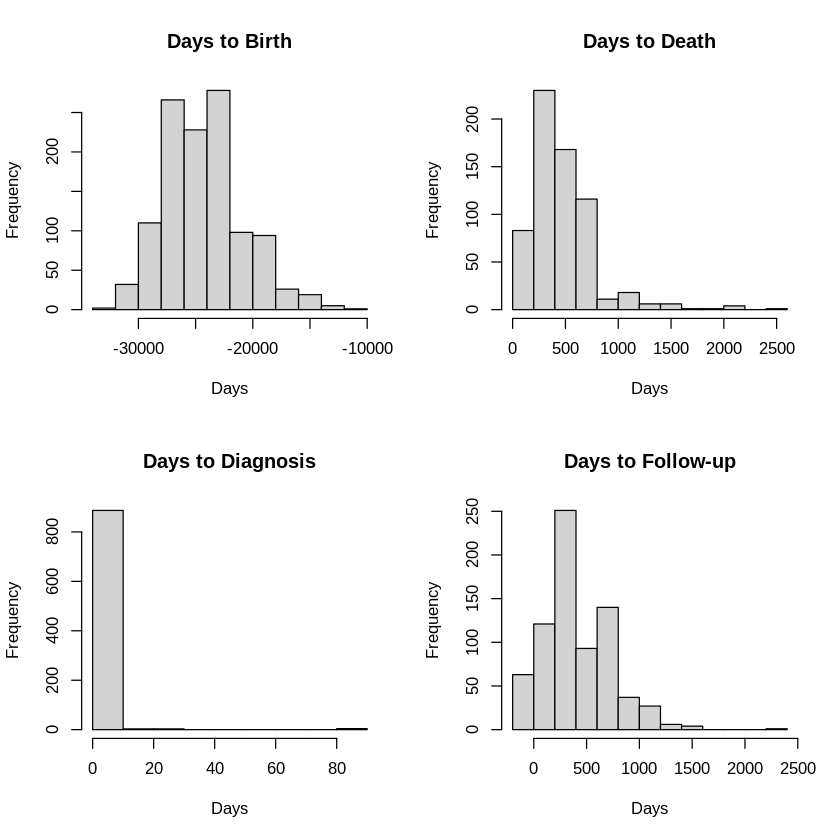

In [504]:
# Установка графических параметров
par(mfrow = c(2, 2))

# Гистограмма для days_to_birth
hist(data_cleaned$days_to_birth, main = "Days to Birth", xlab = "Days")

# Гистограмма для days_to_death
hist(data_cleaned$days_to_death, main = "Days to Death", xlab = "Days")

# Гистограмма для days_to_diagnosis
hist(data_cleaned$days_to_diagnosis, main = "Days to Diagnosis", xlab = "Days")

# Гистограмма для days_to_follow_up
hist(data_cleaned$days_to_follow_up, main = "Days to Follow-up", xlab = "Days")

# Сброс графических параметров
par(mfrow = c(1, 1))


In [505]:
# Подключаем необходимые библиотеки
# Для теста Лиллиефорса (модификация теста Колмогорова-Смирнова)
install.packages("nortest")
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [506]:
library(car)     # Для теста Шапиро-Уилка

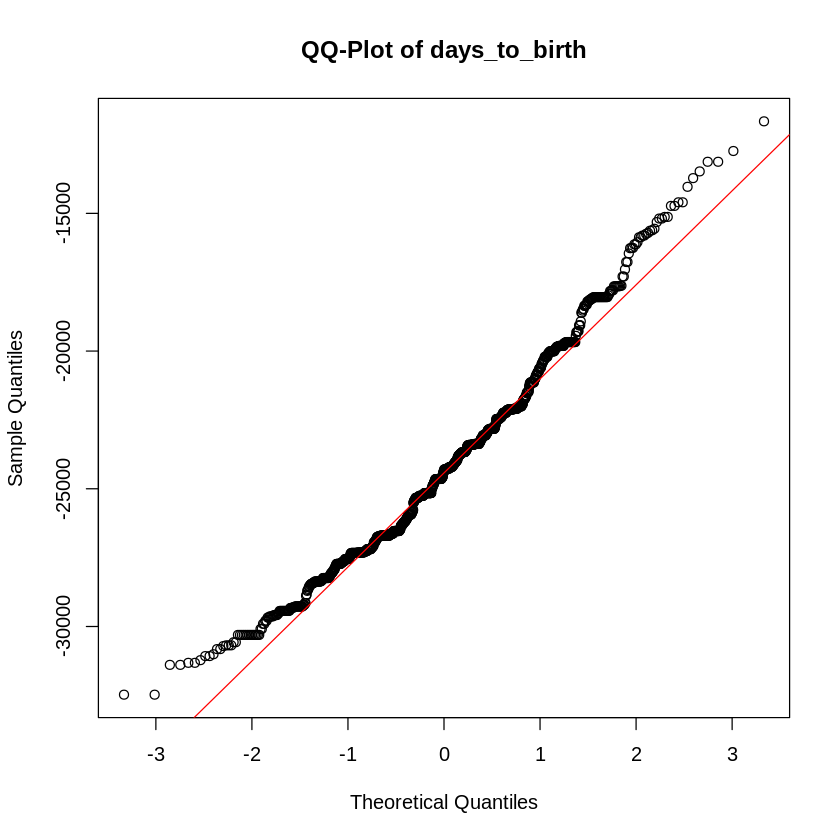

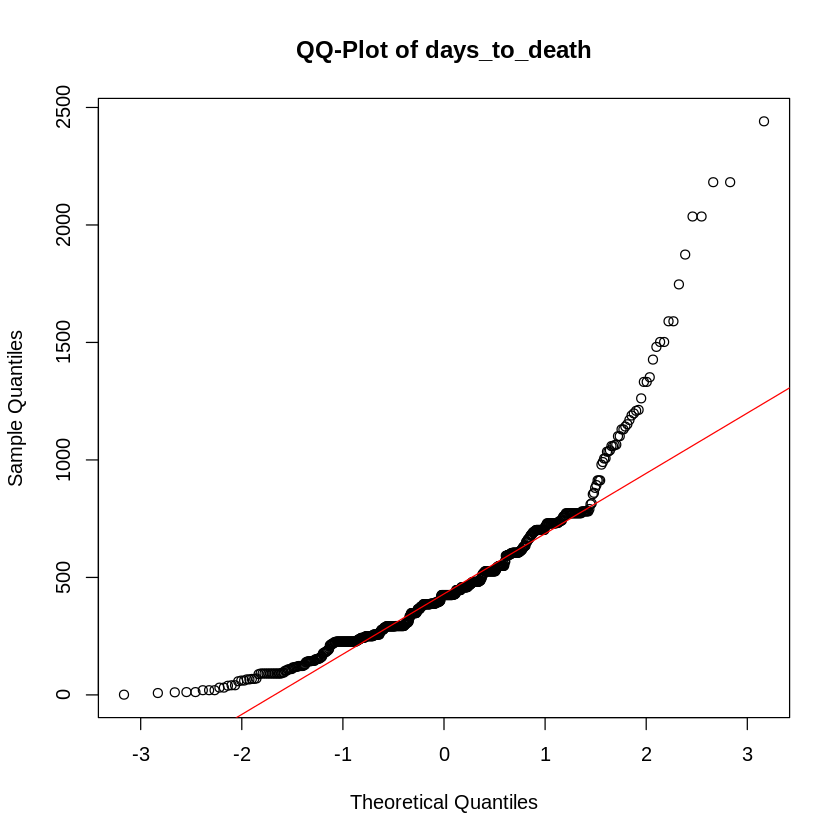

$Shapiro_Wilk

	Shapiro-Wilk normality test

data:  data[[column]]
W = 0.9815, p-value = 5.401e-11


$Kolmogorov_Smirnov

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data[[column]]
D = 0.066701, p-value = 3.554e-13



$Shapiro_Wilk

	Shapiro-Wilk normality test

data:  data[[column]]
W = 0.84419, p-value < 2.2e-16


$Kolmogorov_Smirnov

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data[[column]]
D = 0.12174, p-value < 2.2e-16



$Shapiro_Wilk

	Shapiro-Wilk normality test

data:  data[[column]]
W = 0.92913, p-value < 2.2e-16


$Kolmogorov_Smirnov

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data[[column]]
D = 0.11078, p-value < 2.2e-16



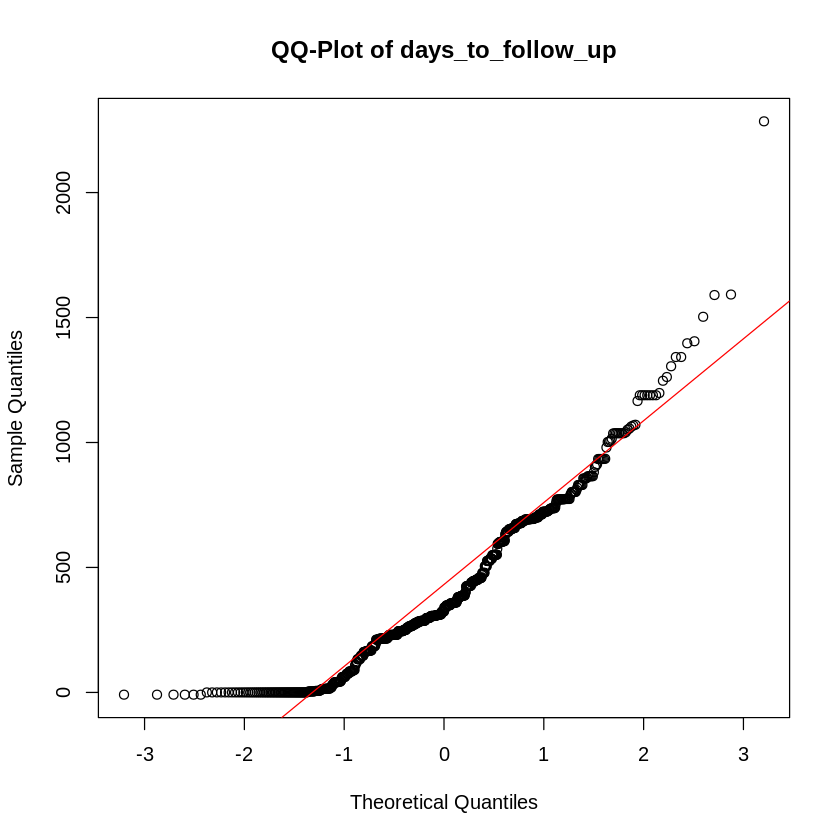

In [507]:
# Функция для визуализации и проверки нормальности
check_normality <- function(data, column) {
  # Гистограмма и QQ-график
  ggplot(data, aes_string(x = column)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = 'blue', alpha = 0.5) +
    geom_density(color = 'red') +
    ggtitle(paste('Histogram and Density Plot of', column))

  qqnorm(data[[column]], main = paste('QQ-Plot of', column))
  qqline(data[[column]], col = 'red')

  # Тесты на нормальность
  shapiro_test <- shapiro.test(data[[column]])
  ks_test <- lillie.test(data[[column]])

  # Результаты тестов
  list(
    Shapiro_Wilk = shapiro_test,
    Kolmogorov_Smirnov = ks_test
  )
}

# Проверка нормальности для каждой переменной
normality_days_to_birth <- check_normality(data_cleaned, "days_to_birth")
normality_days_to_death <- check_normality(data_cleaned, "days_to_death")
normality_days_to_follow_up <- check_normality(data_cleaned, "days_to_follow_up")

# Вывод результатов тестов
normality_days_to_birth
normality_days_to_death
normality_days_to_follow_up


Во всех случаях p-значения тестов Шапиро-Уилка и Колмогорова-Смирнова значительно меньше 0.05, что указывает на отклонение от нормального распределения для всех переменных.

In [508]:
# Применим логарифмическое преобразование к количественным переменным
data_transformed <- data_cleaned %>%
  mutate(log_days_to_birth = log(days_to_birth - min(days_to_birth, na.rm = TRUE) + 1),
         log_days_to_death = log(days_to_death - min(days_to_death, na.rm = TRUE) + 1),
         log_days_to_diagnosis = log(days_to_diagnosis - min(days_to_diagnosis, na.rm = TRUE) + 1),
         log_days_to_follow_up = log(days_to_follow_up - min(days_to_follow_up, na.rm = TRUE) + 1))

# Проверим нормальность распределения после логарифмического преобразования
shapiro_test_transformed <- lapply(data_transformed[, c("log_days_to_birth", "log_days_to_death", "log_days_to_follow_up")], shapiro.test)
ks_test_transformed <- lapply(data_transformed[, c("log_days_to_birth", "log_days_to_death", "log_days_to_follow_up")], function(column) {
  lillie.test(column)
})

# Отобразим результаты
shapiro_test_transformed
ks_test_transformed


$log_days_to_birth

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.71656, p-value < 2.2e-16


$log_days_to_death

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.89144, p-value < 2.2e-16


$log_days_to_follow_up

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.81558, p-value < 2.2e-16



$log_days_to_birth

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  column
D = 0.10944, p-value < 2.2e-16


$log_days_to_death

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  column
D = 0.12223, p-value < 2.2e-16


$log_days_to_follow_up

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  column
D = 0.2246, p-value < 2.2e-16



Во всех случаях p-значения тестов Шапиро-Уилка и Колмогорова-Смирнова значительно меньше 0.05, что указывает на отклонение от нормального распределения для всех переменных.

In [509]:
# Уникальные значения для каждого столбца
unique_values <- sapply(data_cleaned, unique)

# unique_values

## Проверка гипотез


### Сравним пациентов по переменной "Классификация опухоли" (Classification of tumor)

In [510]:
# Частотный анализ
table(data_cleaned$classification_of_tumor)


  metastasis Premalignant      primary 
         620            3          724 

In [511]:
# Тест Краскела-Уоллиса, чтобы сравнить количественные переменные между группами классификации опухоли:

kruskal.test(days_to_death ~ classification_of_tumor, data = data_cleaned)


	Kruskal-Wallis rank sum test

data:  days_to_death by classification_of_tumor
Kruskal-Wallis chi-squared = 10.285, df = 2, p-value = 0.005842


Критерий Краскела-Уоллиса показал статистически значимые различия (p-value = 0.005842) между группами классификации опухоли по количеству дней до смерти (days_to_death). Это означает, что количество дней до смерти различается в зависимости от классификации опухоли.

Warning message:
“Removed 1322 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


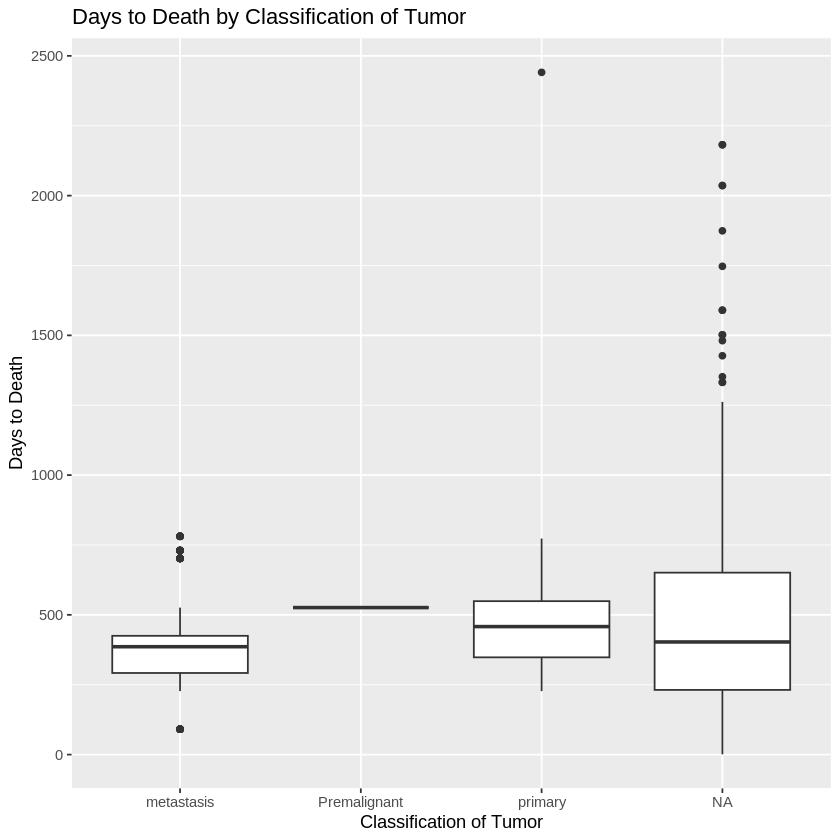

In [512]:
ggplot(data_cleaned, aes(x = classification_of_tumor, y = days_to_death)) +
  geom_boxplot() +
  labs(title = "Days to Death by Classification of Tumor", x = "Classification of Tumor", y = "Days to Death")

При наличии метастаз большинство смертей происходит в более короткий срок (боксплот имеет узкий интерквартильный размах с несколькими выбросами), что предполагает, что метастазы могут быть связаны с более коротким периодом выживания.

Наличие первичной опухоли демонстрирует более широкий интерквартильный размах по сравнению с метастазами, но все еще имеет компактное распределение. Это предполагает умеренный период выживания для первичных опухолей.

In [514]:
table(data_cleaned$gender)


female   male 
   966    999 

In [515]:
# Убедимся, что переменные не содержат NA
df <- data_cleaned %>%
  filter(!is.na(age_at_diagnosis), !is.na(vital_status))

In [516]:
# Удаление пропущенных значений
df <- df[!is.na(df$age_at_diagnosis), ]

In [517]:
table(df$vital_status)


Alive  Dead 
  418   675 

In [518]:
# Преобразование статусной переменной
df$vital_status <- ifelse(df$vital_status == "Alive", 0, 1) # значения "Alive" в 0 и все остальные значения в 1

In [519]:
# Создание объектов выживаемости
surv_obj <- Surv(df$age_at_diagnosis, df$vital_status)

In [520]:
# Создание кривых выживаемости
s1 <- survfit(surv_obj ~ 1, data = df)

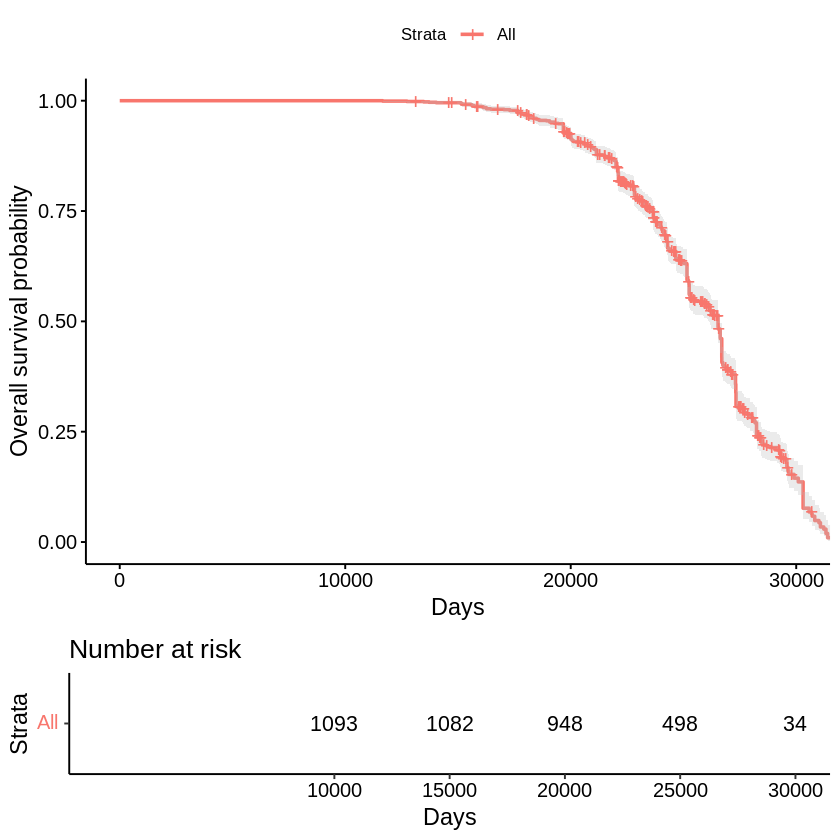

In [521]:
# Построение графиков Каплана-Мейера с доверительными интервалами и таблицей рисков
ggsurvplot(s1, data = df,
           xlab = "Days",
           ylab = "Overall survival probability",
           risk.table = TRUE,
           conf.int = TRUE)


#### Рассмотрим выживаемость пациентов в зависимоти от пола

In [522]:
# Лог-ранговый тест для сравнения групп (например, по полу)
survdiff(Surv(days_to_birth, vital_status) ~ gender, data = df)

Call:
survdiff(formula = Surv(days_to_birth, vital_status) ~ gender, 
    data = df)

                N Observed Expected (O-E)^2/E (O-E)^2/V
gender=female 554      357      352    0.0762     0.164
gender=male   539      318      323    0.0829     0.164

 Chisq= 0.2  on 1 degrees of freedom, p= 0.7 

- Нулевая гипотеза: нет различий в выживаемости между мужчинами и женщинами.
- Альтернативная гипотеза: есть различия в выживаемости между мужчинами и женщинами.

Значение p значительно выше стандартного уровня значимости 0.05, что означает, что мы не можем отвергнуть нулевую гипотезу. Таким образом, нет статистически значимых различий в выживаемости между мужчинами и женщинами в этой выборке.

**Вывод**
Пол не является значимым фактором выживаемости в данной выборке, и выживаемость между мужчинами и женщинами не имеет значимых различий.

In [547]:
# Выживаемость по полу
fit_gender <- survfit(Surv(days_to_death, vital_status) ~ gender, data = df)

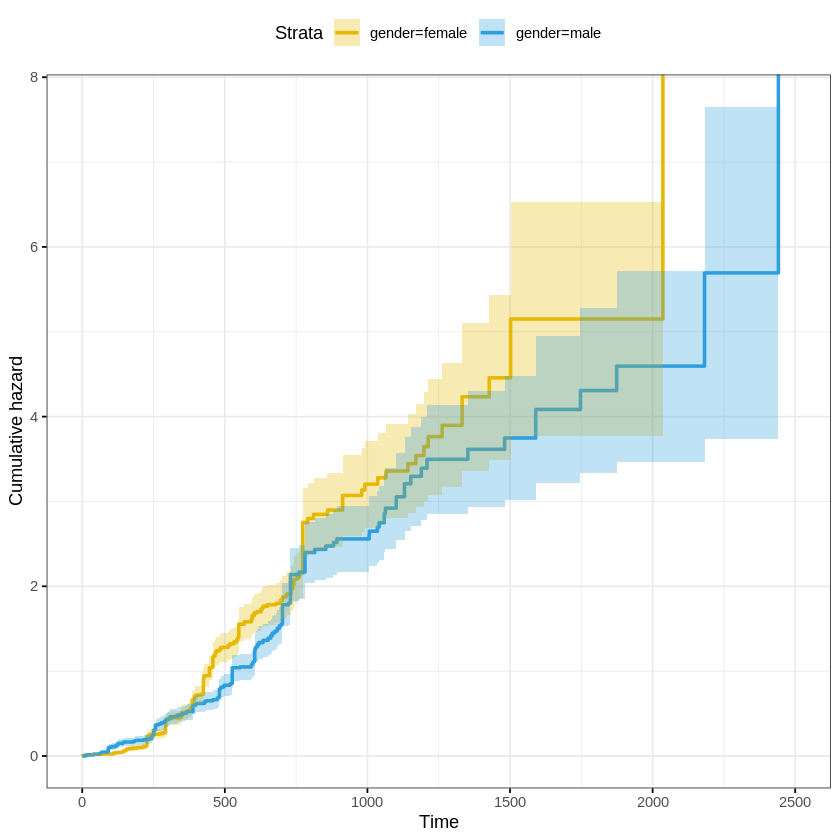

In [549]:
# Визуализация кумулятивной опасности по полу
survminer::ggsurvplot(fit_gender,
           conf.int = TRUE,
           risk.table.col = "strata", # Изменение цвета таблицы рисков по группам
           ggtheme = theme_bw(), # Изменение темы ggplot2
           palette = c("#E7B800", "#2E9FDF"),
           fun = "cumhaz")



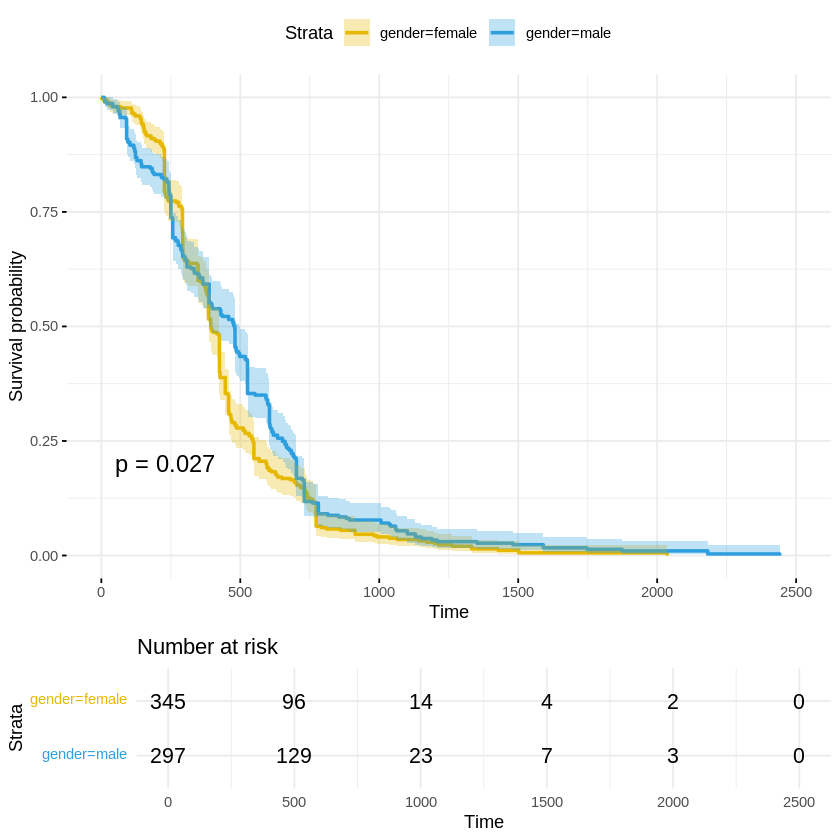

In [558]:
# График кривых выживаемости Каплана-Мейера
ggsurvplot(
  fit_gender,
  data = df,
  conf.int = TRUE,
  pval = TRUE,
  risk.table = TRUE,
  ggtheme = theme_minimal(),
  palette = c("#E7B800", "#2E9FDF")
)


Call:
coxph(formula = Surv(days_to_death, vital_status) ~ gender, data = df)

  n= 642, number of events= 642 
   (451 observations deleted due to missingness)

               coef exp(coef) se(coef)      z Pr(>|z|)  
gendermale -0.18224   0.83340  0.07997 -2.279   0.0227 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

           exp(coef) exp(-coef) lower .95 upper .95
gendermale    0.8334        1.2    0.7125    0.9748

Concordance= 0.518  (se = 0.012 )
Likelihood ratio test= 5.21  on 1 df,   p=0.02
Wald test            = 5.19  on 1 df,   p=0.02
Score (logrank) test = 5.21  on 1 df,   p=0.02


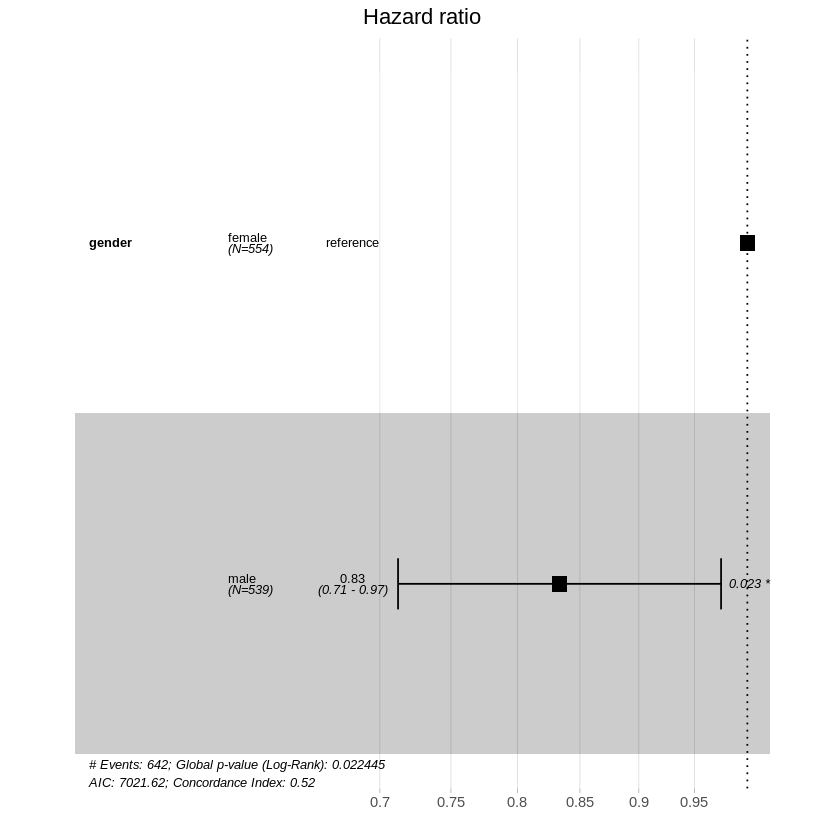

In [556]:
# Модель пропорциональных рисков Кокса
cox_fit <- coxph(Surv(days_to_death, vital_status) ~ gender, data = df)

# Резюме модели Кокса
summary(cox_fit)

# График оценки рисков по модели Кокса
ggforest(cox_fit, data = df)

Анализ показывает, что, в целом, выживаемость мужчин и женщин схожа, без значительных различий между ними на протяжении всего периода наблюдения. Вероятность выживания постепенно снижается для обеих групп. Доверительные интервалы также указывают на аналогичные уровни неопределённости для обоих полов.


In [557]:
# glimpse(df)

In [531]:
# Создадим переменную age_group, которая указывает на группу, к которой принадлежит каждый пациент на основе их возраста при диагнозе._
df$age_group <- cut(df$age_at_diagnosis, breaks = 5, labels = FALSE)

#### Разделим датасет

In [532]:
# Разделение данных по полу
df_male <- df %>% filter(gender == "male")
df_female <- df %>% filter(gender == "female")

#### Категория ткани или органа происхождения опухоли влияет ли на скорость рецидива опухоли

In [536]:
# Лог-ранговый тест для переменной "Tissue_or_organ_of_origin"
log_rank_test_tissue <- survdiff(Surv(days_to_birth, vital_status) ~ tissue_or_organ_of_origin, data = df)
print(log_rank_test_tissue)


Call:
survdiff(formula = Surv(days_to_birth, vital_status) ~ tissue_or_organ_of_origin, 
    data = df)

                                                           N Observed Expected
tissue_or_organ_of_origin=Body of pancreas                45       20    34.15
tissue_or_organ_of_origin=Head of pancreas               396      253   283.02
tissue_or_organ_of_origin=Overlapping lesion of pancreas   4        0     5.18
tissue_or_organ_of_origin=Pancreas, NOS                  611      383   330.00
tissue_or_organ_of_origin=Tail of pancreas                37       19    22.64
                                                         (O-E)^2/E (O-E)^2/V
tissue_or_organ_of_origin=Body of pancreas                   5.866      6.60
tissue_or_organ_of_origin=Head of pancreas                   3.184      5.78
tissue_or_organ_of_origin=Overlapping lesion of pancreas     5.182      5.38
tissue_or_organ_of_origin=Pancreas, NOS                      8.511     17.81
tissue_or_organ_of_origin=Tail of pa

Здесь значение p стремится к нулю, что указывает на то, что существует статистически значимая разница в выживаемости между разными категориями переменной "Tissue_or_organ_of_origin", так как p-значение очень близко к нулю.

Самая низкая выживаемость наблюдается, вероятно, в категориях таких как "Body of pancreas", "Head of pancreas" и "Pancreas, NOS", где наблюдаемые события значительно отличаются от ожидаемых.

А самая высокая выживаемость, вероятно, наблюдается в категории "Breast, NOS", где наблюдаемые события близки к ожидаемым.

#### Степень злокачественности опухоли влияет ли на скорость рецидива опухоли

In [537]:
# Лог-ранговый тест для переменной "Tumor_grade"
log_rank_test_grade <- survdiff(Surv(days_to_birth, vital_status) ~ tumor_grade, data = df)
print(log_rank_test_grade)

Call:
survdiff(formula = Surv(days_to_birth, vital_status) ~ tumor_grade, 
    data = df)

n=597, 496 observations deleted due to missingness.

                 N Observed Expected (O-E)^2/E (O-E)^2/V
tumor_grade=G1  22       10     9.84   0.00259   0.00325
tumor_grade=G2 386      229   191.16   7.48973  17.63934
tumor_grade=G3 132       99   133.34   8.84461  15.97308
tumor_grade=G4   1        1     2.70   1.07462   1.18932
tumor_grade=GX  56       24    25.95   0.14672   0.16773

 Chisq= 19.9  on 4 degrees of freedom, p= 5e-04 


Статистика хи-квадрат (Chisq) равна 19.9, с p-значением, близким к 0. Это указывает на статистически значимые различия в выживаемости между различными категориями степени злокачественности опухоли.

In [538]:
# Подгонка модели пропорциональных рисков Кокса
cox_model <- coxph(Surv(age_group, vital_status) ~ tumor_grade, data = df)

# Сводка модели Кокса
summary(cox_model)


Call:
coxph(formula = Surv(age_group, vital_status) ~ tumor_grade, 
    data = df)

  n= 597, number of events= 363 
   (496 observations deleted due to missingness)

                  coef exp(coef) se(coef)     z Pr(>|z|)    
tumor_gradeG2   0.7185    2.0514   0.3264 2.201   0.0277 *  
tumor_gradeG3   1.7298    5.6393   0.3377 5.122 3.03e-07 ***
tumor_gradeG4   5.8170  335.9615   1.1153 5.216 1.83e-07 ***
tumor_gradeGX   0.1659    1.1804   0.3809 0.435   0.6632    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              exp(coef) exp(-coef) lower .95 upper .95
tumor_gradeG2     2.051   0.487472    1.0820     3.889
tumor_gradeG3     5.639   0.177327    2.9090    10.932
tumor_gradeG4   335.962   0.002977   37.7549  2989.547
tumor_gradeGX     1.180   0.847167    0.5595     2.490

Concordance= 0.66  (se = 0.018 )
Likelihood ratio test= 91.02  on 4 df,   p=<2e-16
Wald test            = 111.4  on 4 df,   p=<2e-16
Score (logrank) test = 208.3  on 4 df,   p=<2e-16


Модель Cox показывает, что категории G2, G3 и G4 опухолевой стадии имеют статистически значимое влияние на выживаемость. Concordance составляет 0.66, что свидетельствует о неплохом качестве предсказания модели.

#### Терапия влияет на выживаемость

In [539]:
df_treated <- df[df$treatment_or_therapy == "yes", ]
df_untreated <- df[df$treatment_or_therapy == "no", ]

# Проводим анализ выживаемости для обеих групп
# Тест Лог-ранга
log_rank_test <- survdiff(Surv(days_to_birth, vital_status) ~ treatment_or_therapy, data = df)
log_rank_test

Call:
survdiff(formula = Surv(days_to_birth, vital_status) ~ treatment_or_therapy, 
    data = df)

n=871, 222 observations deleted due to missingness.

                           N Observed Expected (O-E)^2/E (O-E)^2/V
treatment_or_therapy=no  520      321      291      3.14      7.65
treatment_or_therapy=yes 351      187      217      4.21      7.65

 Chisq= 7.7  on 1 degrees of freedom, p= 0.006 

Результаты теста Лог-ранга показывают статистически значимую разницу в выживаемости между пациентами, получавшими терапию, и пациентами, не получавшими терапию (p = 0.006).

In [540]:
# Проведение анализа выживаемости и получение объекта survfit
surv_fit_treat <- survfit(Surv(days_to_birth, vital_status) ~ treatment_or_therapy, data = df)

! Setting start time to -32475.
ℹ Specify `ggsurvfit::survfit2(start.time)` to override this default.


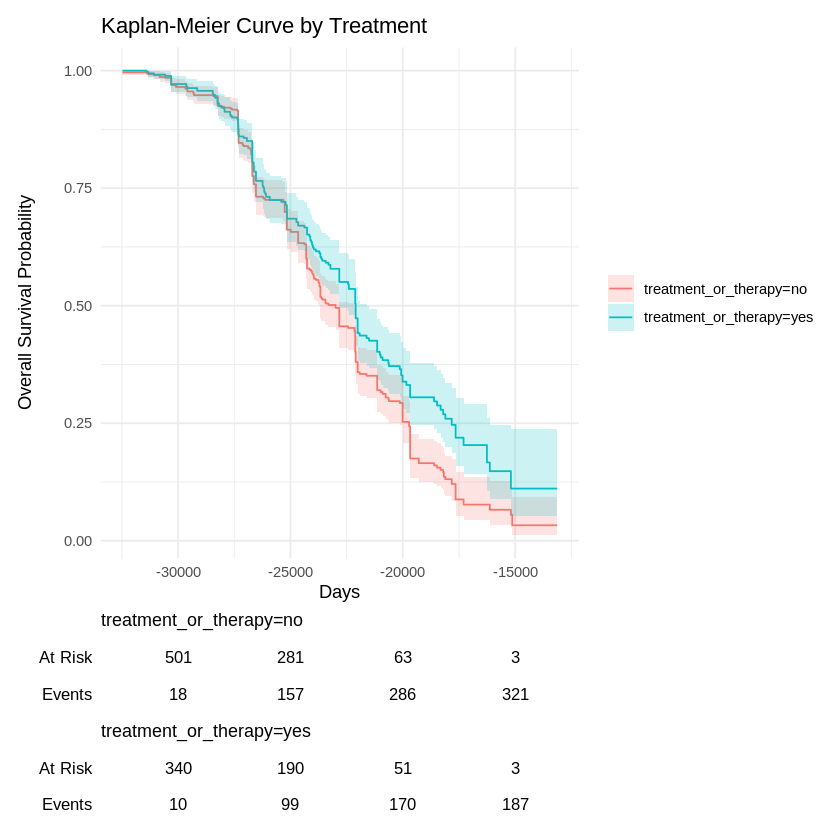

In [541]:
km_plot_treat <- ggsurvfit(surv_fit_treat) +
  labs(
    title = "Kaplan-Meier Curve by Treatment",
    x = "Days",
    y = "Overall Survival Probability"
  ) +
  add_confidence_interval() +
  add_risktable() +
  theme_minimal()

km_plot_treat

In [542]:
# Проведение анализа дисперсии (ANOVA)
aov_result <- aov(age_group ~ treatment_or_therapy, data = df_male)
aov_result

Call:
   aov(formula = age_group ~ treatment_or_therapy, data = df_male)

Terms:
                treatment_or_therapy Residuals
Sum of Squares                3.5288  353.3585
Deg. of Freedom                    1       433

Residual standard error: 0.9033662
Estimated effects may be unbalanced
104 observations deleted due to missingness

In [543]:
# Выполнение теста Хонеста Студента (HSD) Тьюки
tukey_result <- TukeyHSD(aov_result, conf.level = 0.95)

tukey_result

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = age_group ~ treatment_or_therapy, data = df_male)

$treatment_or_therapy
             diff        lwr        upr     p adj
yes-no -0.1830264 -0.3560182 -0.0100345 0.0381625


Различие в возрастных группах между группами с терапией и без не является статистически значимым, как показывает результат теста Tukey.